In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## SVD on Iris data

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


('\nThe singular values', array([95.95066751, 17.72295328,  3.46929666,  1.87891236]))
(4, 2, 97.653468960401, 3.9454189906939177)


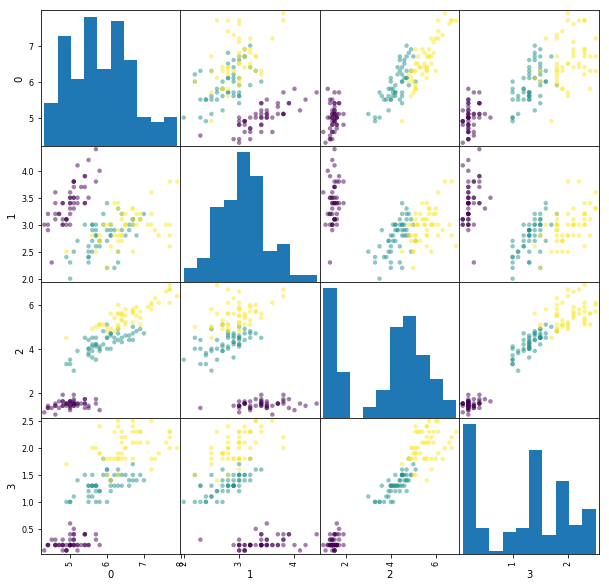

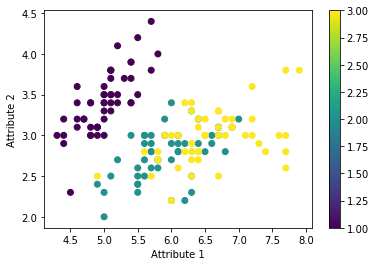

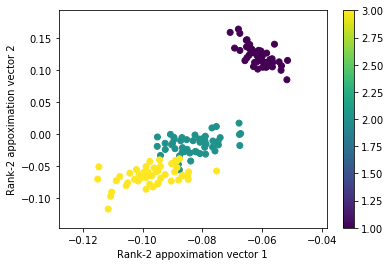

In [2]:
# load the matrix
d = np.loadtxt('iris.csv', delimiter=",",usecols=(0,1,2,3))
# with the following command you will create a vector that reveals what type of Iris is represented in each row
y = np.array([1]*50+[2]*50+[3]*50)

pd.scatter_matrix(pd.DataFrame(d), figsize=(10, 10), c=y, s=80) # pairwise scatter plot with color by class

plt.figure()
plt.scatter(d[:, 0], d[:, 1], c=y)
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.colorbar()

u, s, v = np.linalg.svd(d)
print("\nThe singular values", s[:10])
plt.figure()
plt.scatter(u[:,0], u[:,1],c=y)
plt.xlabel('Rank-2 appoximation vector 1')
plt.ylabel('Rank-2 appoximation vector 2')
plt.colorbar()


k = 2
dk = np.dot(u[:,0:k],np.dot(np.diag(s)[0:k,0:k], v[0:k,:]))
norm = np.linalg.norm(d, ord='fro')
norm_rank2 = np.linalg.norm(d - dk, ord='fro')
print(np.linalg.matrix_rank(d), np.linalg.matrix_rank(dk), norm, norm_rank2)

## SVD and NMF on Newsgroup data

In [3]:
wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')

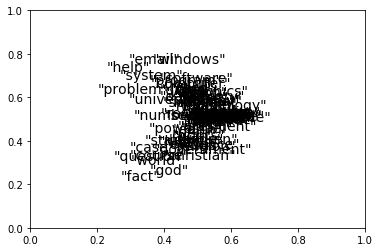

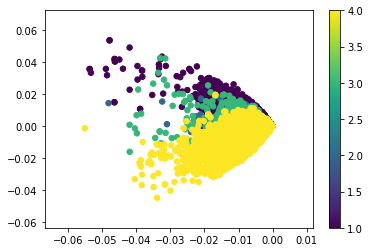

1
2
3
4


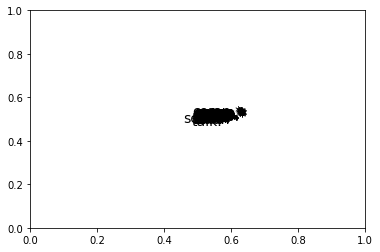

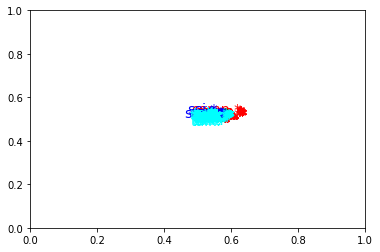

In [4]:
U,s,V=np.linalg.svd(documents,full_matrices=0)
for x,y,text in zip(V[0]+0.5,V[1]+0.5,wordlist):
    plt.text(x,y,text,fontsize=14)
plt.figure()

sc=plt.scatter(U[:,0],U[:,1],30,newsgroup,facecolors='none')
plt.colorbar(sc)
plt.show()

r=np.random.randint(0,16242,100)
plt.figure()
for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
    plt.text(x,y,groupname,fontsize=14)

c = ['red','green','blue','cyan']
plt.figure()
for i in range(1,5):
    q=np.where(newsgroup==i)[0]
    r1 = np.random.randint(0,len(q),50)
    r=q[r1]
    for x,y,groupname in zip(U[r,0]+0.5,U[r,1]+0.5,groupnames[newsgroup[r]-1]):
        plt.text(x,y,groupname,color=c[i-1],fontsize=14)
    print(i)
    

((16242L, 10L), (10L, 100L))
0
['"card"' '"case"' '"computer"' '"data"' '"disk"' '"display"' '"dos"'
 '"drive"' '"driver"' '"files"' '"format"' '"ftp"' '"graphics"' '"image"'
 '"mac"' '"memory"' '"number"' '"pc"' '"phone"' '"program"' '"scsi"'
 '"server"' '"software"' '"space"' '"technology"' '"version"' '"video"'
 '"win"' '"windows"' '"world"']
1
['"aids"' '"car"' '"case"' '"children"' '"course"' '"data"' '"disease"'
 '"doctor"' '"evidence"' '"fact"' '"food"' '"government"' '"gun"'
 '"health"' '"hit"' '"human"' '"insurance"' '"israel"' '"jews"' '"law"'
 '"medicine"' '"number"' '"oil"' '"patients"' '"phone"' '"power"'
 '"president"' '"program"' '"religion"' '"research"' '"rights"'
 '"science"' '"space"' '"state"' '"studies"' '"war"' '"water"' '"world"']
2
['"computer"' '"data"' '"earth"' '"image"' '"mac"' '"medicine"' '"nasa"'
 '"phone"' '"program"' '"research"' '"science"' '"space"' '"state"'
 '"studies"' '"technology"' '"university"']
3
['"bible"' '"children"' '"christian"' '"course"

([<matplotlib.axis.XTick at 0x1016c470>,
 <a list of 10 Text xticklabel objects>)

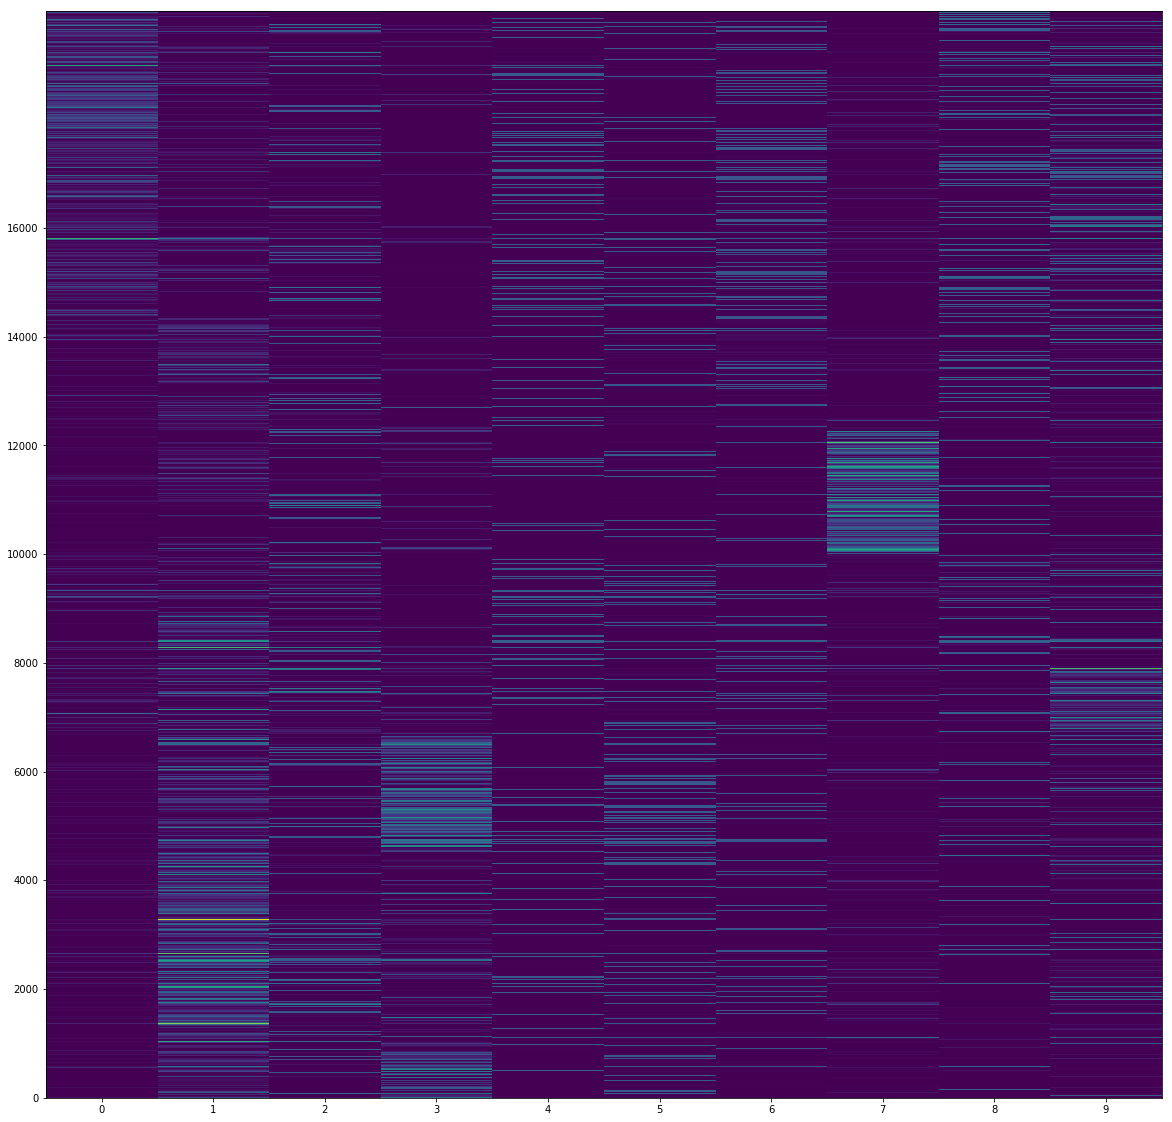

In [5]:
"""Example of nonnegative matrix factorization (NMF) which approximates data matrix A as W*H"""
from sklearn.decomposition import NMF
k = 10
model = NMF(n_components=k).fit(documents)
W, H = model.fit_transform(documents), model.components_
print(W.shape, H.shape)

for i in range(10):
    print(i)
    print(wordlist[np.where(H[i,:] > 0.10)[0]])
plt.figure(figsize=(20, 20))
plt.imshow(W, extent=[0, 1, 0, 1], aspect='auto')
plt.yticks(np.arange(0, 0.9, 0.1), np.arange(0, len(W)+1, 2000))
plt.xticks(np.arange(0.05, 1.0, 0.1), np.arange(0, 10, 1))